In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/digit-recognizer/train.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
df.shape

(42000, 785)

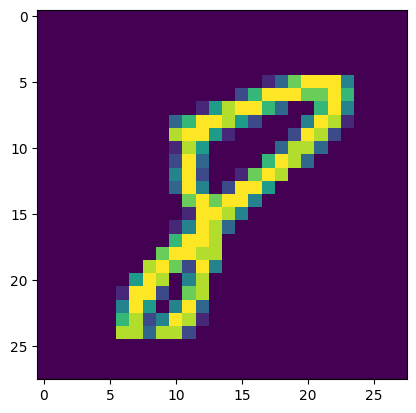

In [4]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [5]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

### Now Lets see what happens when we give very high dimensional data to a distance based ML ALgo (KNN)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state = 42)
X_train.shape

(33600, 784)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [8]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)

0.9648809523809524

### As you can see, the accuracy is good but the time taken for the computation is high, Because to predict the value it will have to calculate the distance of the given points to all 700+ features for more than 30K data points

### Now lets use PCA to get low dimensional data and then feed it to the same algo

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
# Mean centering the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [14]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [15]:
X_train_trf.shape

(33600, 100)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,Y_train)

KNeighborsClassifier()

In [17]:
y_pred_trf = knn.predict(X_test_trf)

### The difference in computational stress in significant

In [18]:
accuracy_score(Y_test,y_pred_trf)

0.9541666666666667

#### Around same accuracy but will optimized steps

#### Now lets performe the PCA process for different values of n_components 

In [19]:
# for i in range(1,50):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)

#     knn = KNeighborsClassifier()
#     knn.fit(X_train_trf,Y_train)
#     y_pred_trf = knn.predict(X_test_trf)
#     print(f"Accuracy for {i} no of n_components => ",accuracy_score(Y_test,y_pred_trf))


#### We can see that after certain loops the rate of increase in accuracy dereaases  and we get an approx max accuracy of 95%, so we take that corresponding number of n_components.

### Lets Visualize Transformed Data

In [20]:
# Transforming dataset for 2D data using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [21]:
X_train_2d.shape

(33600, 2)

In [22]:
# ! pip install plotly

In [23]:
import plotly.express as px

y_train_trf = Y_train.astype(str)
fig = px.scatter(x=X_train_2d[:,0],
                y=X_train_2d[:,1], 
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig

#### Lets visualize in 3D now 

In [24]:
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train)
X_test_3d = pca.transform(X_test)


In [25]:
fig = px.scatter_3d(df,x=X_train_3d[:,0],
                y=X_train_3d[:,1], 
                z= X_train_3d[:,2] ,
                color=y_train_trf,
                )
fig